In [1]:
import gym
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from stable_baselines.td3.policies import MlpPolicy, LnMlpPolicy
from stable_baselines.common.vec_env import DummyVecEnv
from stable_baselines import PPO2, TD3, results_plotter
from stable_baselines.bench import Monitor
from stable_baselines.ddpg.noise import NormalActionNoise, OrnsteinUhlenbeckActionNoise

# Optional: PPO2 requires a vectorized environment to run
# the env is now wrapped automatically when passing it to the constructor
log_dir = './temp'
base_env = gym.make('Humanoid-v2')
env = DummyVecEnv([lambda: Monitor(base_env, log_dir, allow_early_resets=True)])
# env = gym.make('Humanoid-v2')
# env = DummyVecEnv(Monitor([lambda: env, "/tmp/sac/"]))

C:\Users\Vulcan\.conda\envs\gym\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Vulcan\.conda\envs\gym\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Vulcan\.conda\envs\gym\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Vulcan\.conda\envs\gym\lib\site-packages\tensorflow\python\framework\dtypes.

In [1]:
timesteps = 1000000
log_interval = 1000
model_file_name =  'td3_normal_noise'

In [3]:
policy_kwargs = {}
n_actions = env.action_space.shape[-1]
action_noise = NormalActionNoise(mean=np.zeros(n_actions), sigma=0.1 * np.ones(n_actions))
model = TD3(MlpPolicy, env, verbose=1, action_noise=action_noise, policy_kwargs=policy_kwargs)
model.learn(total_timesteps=timesteps, log_interval=log_interval)
model.save(model_file_name)





Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Use keras.layers.dense instead.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


---------------------------------------
| current_lr              | 0.0003    |
| ep_rewmean              | 405       |
| episodes                | 1000      |
| eplenmean               | 73.6      |
| fps                     | 176       |
| mean 100 episode reward | 405       |
| n_updates               | 52400     |
| qf1_loss                | 15.094709 |
| qf2_loss                | 14.905059 |
| time_elapsed            | 298       |
| total timesteps         | 52551     |
---------------------------------------
---------------------------------------
| current_lr              | 0.0003    |
| ep_rewmean              | 367       |
| episodes          

In [2]:
import gym
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from stable_baselines.td3.policies import MlpPolicy, LnMlpPolicy
from stable_baselines.common.vec_env import DummyVecEnv
from stable_baselines import PPO2, TD3, results_plotter
from stable_baselines.bench import Monitor

# Optional: PPO2 requires a vectorized environment to run
# the env is now wrapped automatically when passing it to the constructor
log_dir = './temp'
base_env = gym.make('Humanoid-v2')
env = DummyVecEnv([lambda: Monitor(base_env, log_dir, allow_early_resets=True)])
# env = gym.make('Humanoid-v2')
# env = DummyVecEnv(Monitor([lambda: env, "/tmp/sac/"]))

C:\Users\Vulcan\.conda\envs\gym\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Vulcan\.conda\envs\gym\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Vulcan\.conda\envs\gym\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Vulcan\.conda\envs\gym\lib\site-packages\tensorflow\python\framework\dtypes.

In [3]:
model = TD3.load(model_file_name, env=env)
obs = env.reset()
try:
    for i in range(10000):
        action, _states = model.predict(obs)
        obs, rewards, dones, info = env.step(action)
        env.render()
finally:
    env.close()





Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Use keras.layers.dense instead.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Creating window glfw


<Figure size 432x288 with 0 Axes>

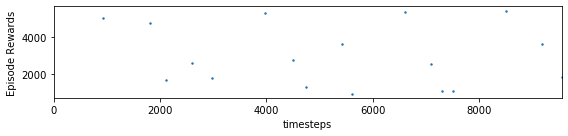

In [4]:
plt.figure()
results_plotter.plot_results(["."], timesteps, results_plotter.X_TIMESTEPS, "")
plt.show()